In [41]:
# 支持向量机非线性回归SVR模型
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [3]:
# 加载用于回归问题的数据集b
df = pd.read_excel('D:\桌面\数据挖掘-汽油辛烷值损失模型优化\暑期模拟-3-2022-08-18\模拟练习-3 B题 汽油辛烷值建模\降维后特征.xlsx')
df

,"硫含量,μg/g","饱和烃,v%（烷烃+环烷烃）","烯烃,v%","芳烃,v%","溴值\n,gBr/100g","密度(20℃),\nkg/m³","硫含量,μg/g.1",辛烷值RON.1,RON损失\n（不是变量）,"焦炭,wt%","S, wt%",氢油比,反应过滤器压差,还原器压力,还原器流化氢气流量,反应器上部温度,辛烷值RON
0,188.000000,53.230000,24.400000,22.370000,61.487143,726.085714,3.2,89.22,1.38,2.32,7.30,0.276318,31.211968,2.526857,647.752380,424.615900,90.6
1,169.000000,52.300000,26.400000,21.300000,61.880000,731.300000,3.2,89.32,1.18,2.37,7.34,0.277127,31.461969,2.527411,651.821920,420.953385,90.5
2,177.000000,52.300000,26.314286,21.385714,61.722857,729.614286,3.2,89.32,1.38,2.43,7.27,0.277013,31.339997,2.528865,650.747150,423.941065,90.7
3,159.000000,52.300000,26.100000,21.600000,61.330000,725.400000,3.2,89.02,1.38,3.08,7.35,0.277222,31.033443,2.530589,652.669055,423.722805,90.4
4,173.000000,52.242857,26.671429,21.085714,61.332857,725.428571,3.2,88.32,1.28,2.45,6.58,0.277310,30.826894,2.530938,649.340920,427.132000,89.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,271.428571,47.190000,31.300000,21.510000,52.020000,725.200000,3.2,88.05,1.15,9.45,12.24,0.238174,18.169647,2.392515,819.708705,424.567210,89.2
321,271.428571,47.190000,31.300000,21.510000,52.020000,725.200000,3.2,87.95,1.25,9.09,11.82,0.239947,18.356451,2.393195,820.912883,425.062968,89.2
322,271.428571,47.190000,31.300000,21.510000,52.020000,725.200000,3.2,88.05,1.35,5.72,10.96,0.237478,18.477196,2.398691,818.246100,425.390800,89.4
323,266.000000,46.720000,33.780000,19.500000,45.450000,730.000000,3.6,88.12,1.28,4.33,9.71,0.235185,18.626541,2.394805,820.887623,426.057338,89.4


In [31]:
# 拆分成训练集和测试集，测试集大小为原始数据集大小的 2/10  (即训练集数为260)
df_train=df.loc[0:260,:]
df_test=df.loc[261:324,:]
y_train=df["RON损失\n（不是变量）"].loc[0:260]
y_test=df["RON损失\n（不是变量）"].loc[261:324]
df_train=df_train.copy()
df_test=df_test.copy()
x_train=df_train.drop('RON损失\n（不是变量）', axis=1)
x_test=df_test.drop('RON损失\n（不是变量）', axis=1)

In [29]:
# 支持向量机非线性回归SVR模型
def test_SVR_linear(*data):
    X_train,X_test,y_train,y_test=data
    regr=svm.SVR(kernel='linear')
    regr.fit(X_train,y_train)
    y_pred = regr.predict(X_test)
    print('Coefficients:%s, intercept %s'%(regr.coef_,regr.intercept_))
    print('Score: %.3f' % regr.score(X_test, y_test))
    return y_pred

In [36]:
# 调用 test_LinearSVR
y_pred=test_SVR_linear(x_train,x_test,y_train,y_test)

Coefficients:[[ 2.70508832e-04  3.18737140e-01  2.95097064e-01  3.11165796e-01
   1.22491374e-03  1.22883065e-02  1.43147354e-02 -8.28075580e-01
   4.83029471e-02  2.02969961e-02 -4.12521932e-01  1.48136551e-02
   3.16150686e-01  3.01231507e-04 -2.16910515e-02  8.19516936e-01]], intercept [-31.47459424]
Score: -1.349


In [43]:
# 更新索引
y_test.reset_index(drop=True,inplace=True)
x_test.reset_index(drop=True,inplace=True)

In [26]:
# 模型评价
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = metrics.mean_squared_error(y_test, y_pred)**0.5
MAE = metrics.mean_absolute_error(y_test, y_pred)
MAPE = metrics.mean_absolute_percentage_error(y_test, y_pred)

In [37]:
# 四个标准的范围都是[0,+∞)，当预测值与真实值完全吻合时等于0，即完美模型；误差越大，这些值越大，模型越不好。
MSE,RMSE,MAE,MAPE 

(0.04990131595259008,
 0.2233860245238947,
 0.1798207597777045,
 0.1541757903747526)

MSE: 0.04990131595259008
R2 =  -1.3486884894865074
MAE =  0.1798207597777045


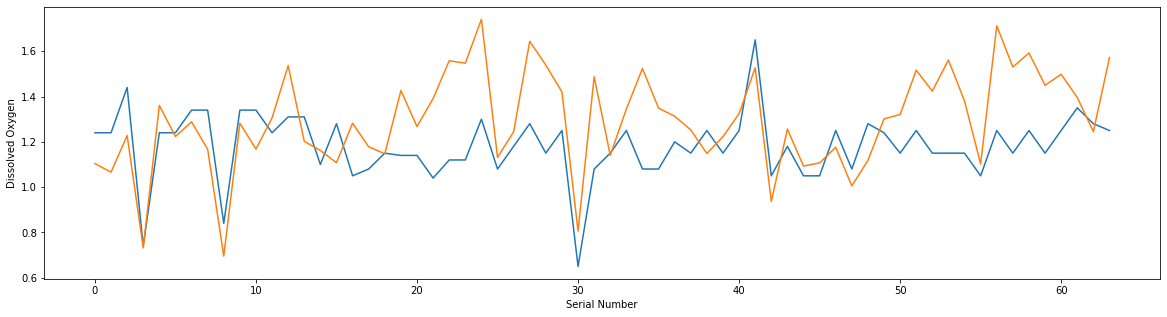

In [44]:
## 可视化SVR预测效果
plt.plot(y_test)
plt.plot(y_pred)
fig = plt.gcf()
fig.set_size_inches(20, 5)
plt.xlabel('Serial Number')
plt.ylabel('Dissolved Oxygen')
SVR1=y_pred 
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2 = ",metrics.r2_score(y_test,y_pred)) 
print("MAE = ",mean_absolute_error(y_test,y_pred))


In [7]:
def test_SVR_rbf(*data):
    '''测试高斯核的SVR的预测性能随 gamma 参数的影响'''
    X_train,X_test,y_train,y_test=data
    gammas=range(1,20)
    train_scores=[]
    test_scores=[]
    for gamma in gammas:
        regr=svm.SVR(kernel='rbf',gamma=gamma)
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train,y_train))
        test_scores.append(regr.score(X_test, y_test))
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(gammas,train_scores,label="Training score ",marker='+' )
    ax.plot(gammas,test_scores,label= " Testing score ",marker='o' )
    ax.set_title( "SVR_rbf")
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_ylim(-1,1)
    ax.legend(loc="best",framealpha=0.5)
    plt.show()

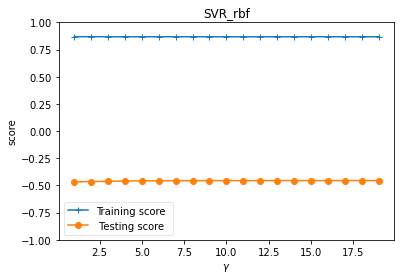

In [8]:
# 调用 test_SVR_rbf
test_SVR_rbf(x_train,x_test,y_train,y_test)

In [9]:
def test_SVR_sigmoid(*data):

    '''测试 sigmoid 核的 SVR 的预测性能随 gamma、coef0 的影响.'''
    X_train,X_test,y_train,y_test=data
    fig=plt.figure()
    ### 测试 gammam，固定 coef0 为 0.01 ####
    gammas=np.logspace(-1,3)
    train_scores=[]
    test_scores=[]
    for gamma in gammas:
        regr=svm.SVR(kernel='sigmoid',gamma=gamma,coef0=0.01)
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train,y_train))
        test_scores.append(regr.score(X_test, y_test))
    ax=fig.add_subplot(1,2,1)
    ax.plot(gammas,train_scores,label="Training score ",marker='+' )
    ax.plot(gammas,test_scores,label= " Testing score ",marker='o' )
    ax.set_title( "SVR_sigmoid_gamma r=0.01")
    ax.set_xscale("log")
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_ylim(-1,1)
    ax.legend(loc="lower left",framealpha=0.5)
    ### 测试 r ，固定 gamma 为 10 ######
    rs=np.linspace(0,5)
    train_scores=[]
    test_scores=[]
    for r in rs:
        regr=svm.SVR(kernel='sigmoid',coef0=r,gamma=10)
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train,y_train))
        test_scores.append(regr.score(X_test, y_test))
    ax=fig.add_subplot(1,2,2)
    ax.plot(rs,train_scores,label="Training score ",marker='+' )
    ax.plot(rs,test_scores,label= " Testing score ",marker='o' )
    ax.set_title( "SVR_sigmoid_r gamma=10")
    ax.set_xlabel(r"r")
    ax.set_ylabel("score")
    ax.set_ylim(-1,1)
    ax.legend(loc="lower left",framealpha=0.5)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()


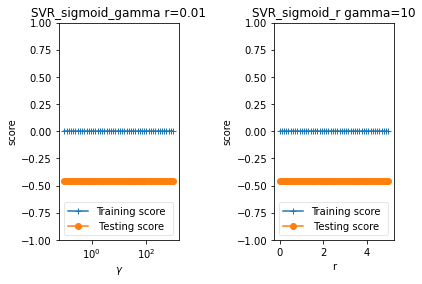

In [10]:
# 调用 test_SVR_sigmoid
test_SVR_sigmoid(x_train,x_test,y_train,y_test)

In [14]:
def test_SVR_poly(*data):
    '''测试多项式核的 SVR 的预测性能随 degree、gamma、coef0 的影响.'''
    X_train,X_test,y_train,y_test=data
    fig=plt.figure()
    ### 测试 degree ####
    degrees=range(1,21)
    train_scores=[]
    test_scores=[]
    for degree in degrees:
        regr=svm.SVR(kernel='poly',degree=degree,coef0=1)
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train,y_train))
        test_scores.append(regr.score(X_test, y_test))
    ax=fig.add_subplot(1,3,1)
    ax.plot(degrees,train_scores,label="Training score ",marker='+' )
    ax.plot(degrees,test_scores,label= " Testing score ",marker='o' )
    ax.set_title( "SVR_poly_degree r=1")
    ax.set_xlabel("p")
    ax.set_ylabel("score")
    ax.set_ylim(-1,1.)
    ax.legend(loc="best",framealpha=0.5)
    
    ### 测试 gamma，固定 degree为3，coef0 为 1 ####
    gammas=range(1,41)
    train_scores=[]
    test_scores=[]
    for gamma in gammas:
        regr=svm.SVR(kernel='poly',gamma=gamma,degree=3,coef0=1)
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train,y_train))
        test_scores.append(regr.score(X_test, y_test))
    ax=fig.add_subplot(1,3,2)
    ax.plot(gammas,train_scores,label="Training score ",marker='+' )
    ax.plot(gammas,test_scores,label= " Testing score ",marker='o' )
    ax.set_title( "SVR_poly_gamma r=1")
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_ylim(-1,1)
    ax.legend(loc="best",framealpha=0.5)

    ### 测试 r，固定 gamma 为 20，degree为 3 ######
    rs=range(0,21)
    train_scores=[]
    test_scores=[]
    for r in rs:
        regr=svm.SVR(kernel='poly',gamma=20,degree=3,coef0=r)
        regr.fit(X_train,y_train)
        train_scores.append(regr.score(X_train,y_train))
        test_scores.append(regr.score(X_test, y_test))
    ax=fig.add_subplot(1,3,3)
    ax.plot(rs,train_scores,label="Training score ",marker='+' )
    ax.plot(rs,test_scores,label= " Testing score ",marker='o' )
    ax.set_title( "SVR_poly_r gamma=20 degree=3")
    ax.set_xlabel(r"r")
    ax.set_ylabel("score")
    ax.set_ylim(-1,1.)
    ax.legend(loc="best",framealpha=0.5)
    
    plt.subplots_adjust(wspace=5)
    plt.show()

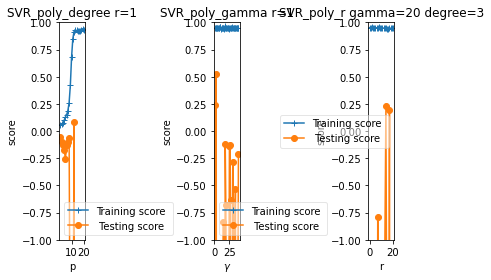

In [15]:
# 调用 test_SVR_poly
test_SVR_poly(x_train,x_test,y_train,y_test)